In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
path = "./output/mnist/z_ass/"

label_dist_files = ["1z_rnd_num_client300.part10.partition_iid_nclient300.npy.label_dist_across_servers.csv",
           "g_nw_d_minkowski_p1.0_MLP2_G10_partition_iid_nclient300.npy.part.10.label_dist_across_servers.csv"
          ]

nlines = 10 #10 servers if so, change the above assignment files
fontsize = 20

In [9]:
df_rnd_label_dist = pd.read_csv(path + label_dist_files[0])
df_metis_label_dist = pd.read_csv(path + label_dist_files[1])

print(df_rnd_label_dist.shape)
print(df_metis_label_dist.shape)

df_rnd_label_dist.dropna(inplace = True)
df_metis_label_dist.dropna(inplace = True)

print(df_rnd_label_dist)
#print(df_metis_label_dist.shape)



(101, 3)
(101, 3)
     rnd_server_id  label_id img_count
1              0.0       0.0       613
2              0.0       1.0       696
3              0.0       2.0       614
4              0.0       3.0       635
5              0.0       4.0       605
..             ...       ...       ...
96             9.0       5.0       363
97             9.0       6.0       399
98             9.0       7.0       414
99             9.0       8.0       388
100            9.0       9.0       398

[100 rows x 3 columns]


In [10]:
rnd_lines, metis_lines = [], []
n_zfiles = len(label_dist_files)

for i in range(nlines):
    
    x = (df_rnd_label_dist.loc[df_rnd_label_dist['rnd_server_id'] == i]['label_id'].values.squeeze())
    y = pd.to_numeric(df_rnd_label_dist.loc[df_rnd_label_dist['rnd_server_id'] == i]['img_count'].values.squeeze())
    
    rnd_lines.append([x,y])

for i in range(nlines):
    
    x = (df_metis_label_dist.loc[df_metis_label_dist['metis_server_id'] == i]['label_id'].values.squeeze())
    y = pd.to_numeric(df_metis_label_dist.loc[df_metis_label_dist['metis_server_id'] == i]['img_count'].values.squeeze())
    
    metis_lines.append([x,y])


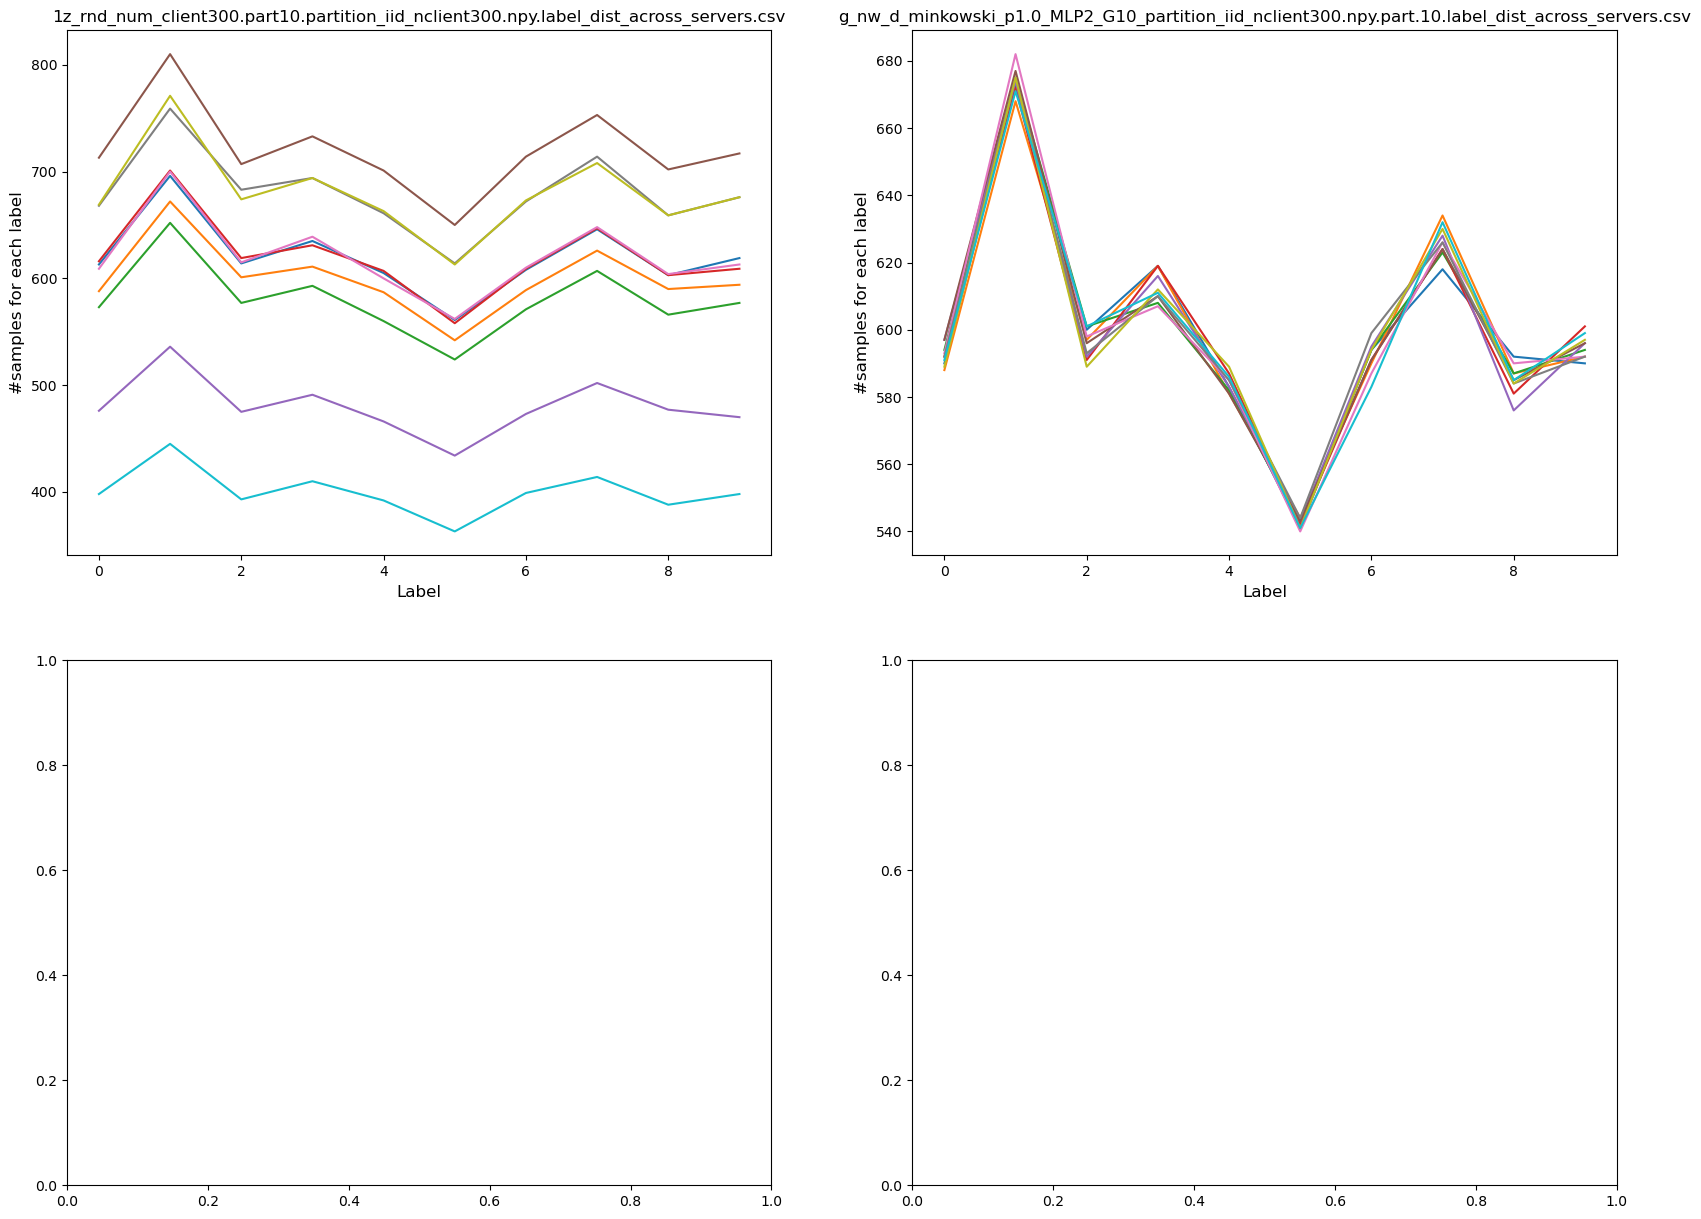

In [11]:
#fig, axs = plt.subplots(n_zfiles+1, n_pfiles, figsize=(20,15))
fig, axs = plt.subplots(2,2, figsize=(20,15))
#axs[0,0].figure.set_dpi(500)
#axs[0,1].figure.set_dpi(500)

axs[0,0].set_title(label_dist_files[0], size=12) #random assignment
for i in range(nlines):
    axs[0,0].plot(rnd_lines[i][0], rnd_lines[i][1])

axs[0,0].set_ylabel("#samples for each label", size=12)
axs[0,0].set_xlabel("Label", size=12)
#axs[0,0].set_ylim(ymin = 10, ymax=1100)
#axs[0,0].xticks(fontsize=12)
#axs[0,0].yticks(fontsize=12)

axs[0,1].set_title(label_dist_files[1], size=12) #metis assignment
for i in range(nlines):
    axs[0,1].plot(metis_lines[i][0], metis_lines[i][1])

axs[0,1].set_ylabel("#samples for each label", size=12)
axs[0,1].set_xlabel("Label", size=12)
#axs[0,1].set_ylim(ymin = 20, ymax=1100)
#axs[0,1].set_xticks(fontsize=12)
#axs[0,1].set_yticks(fontsize=12)

        
plt.show()

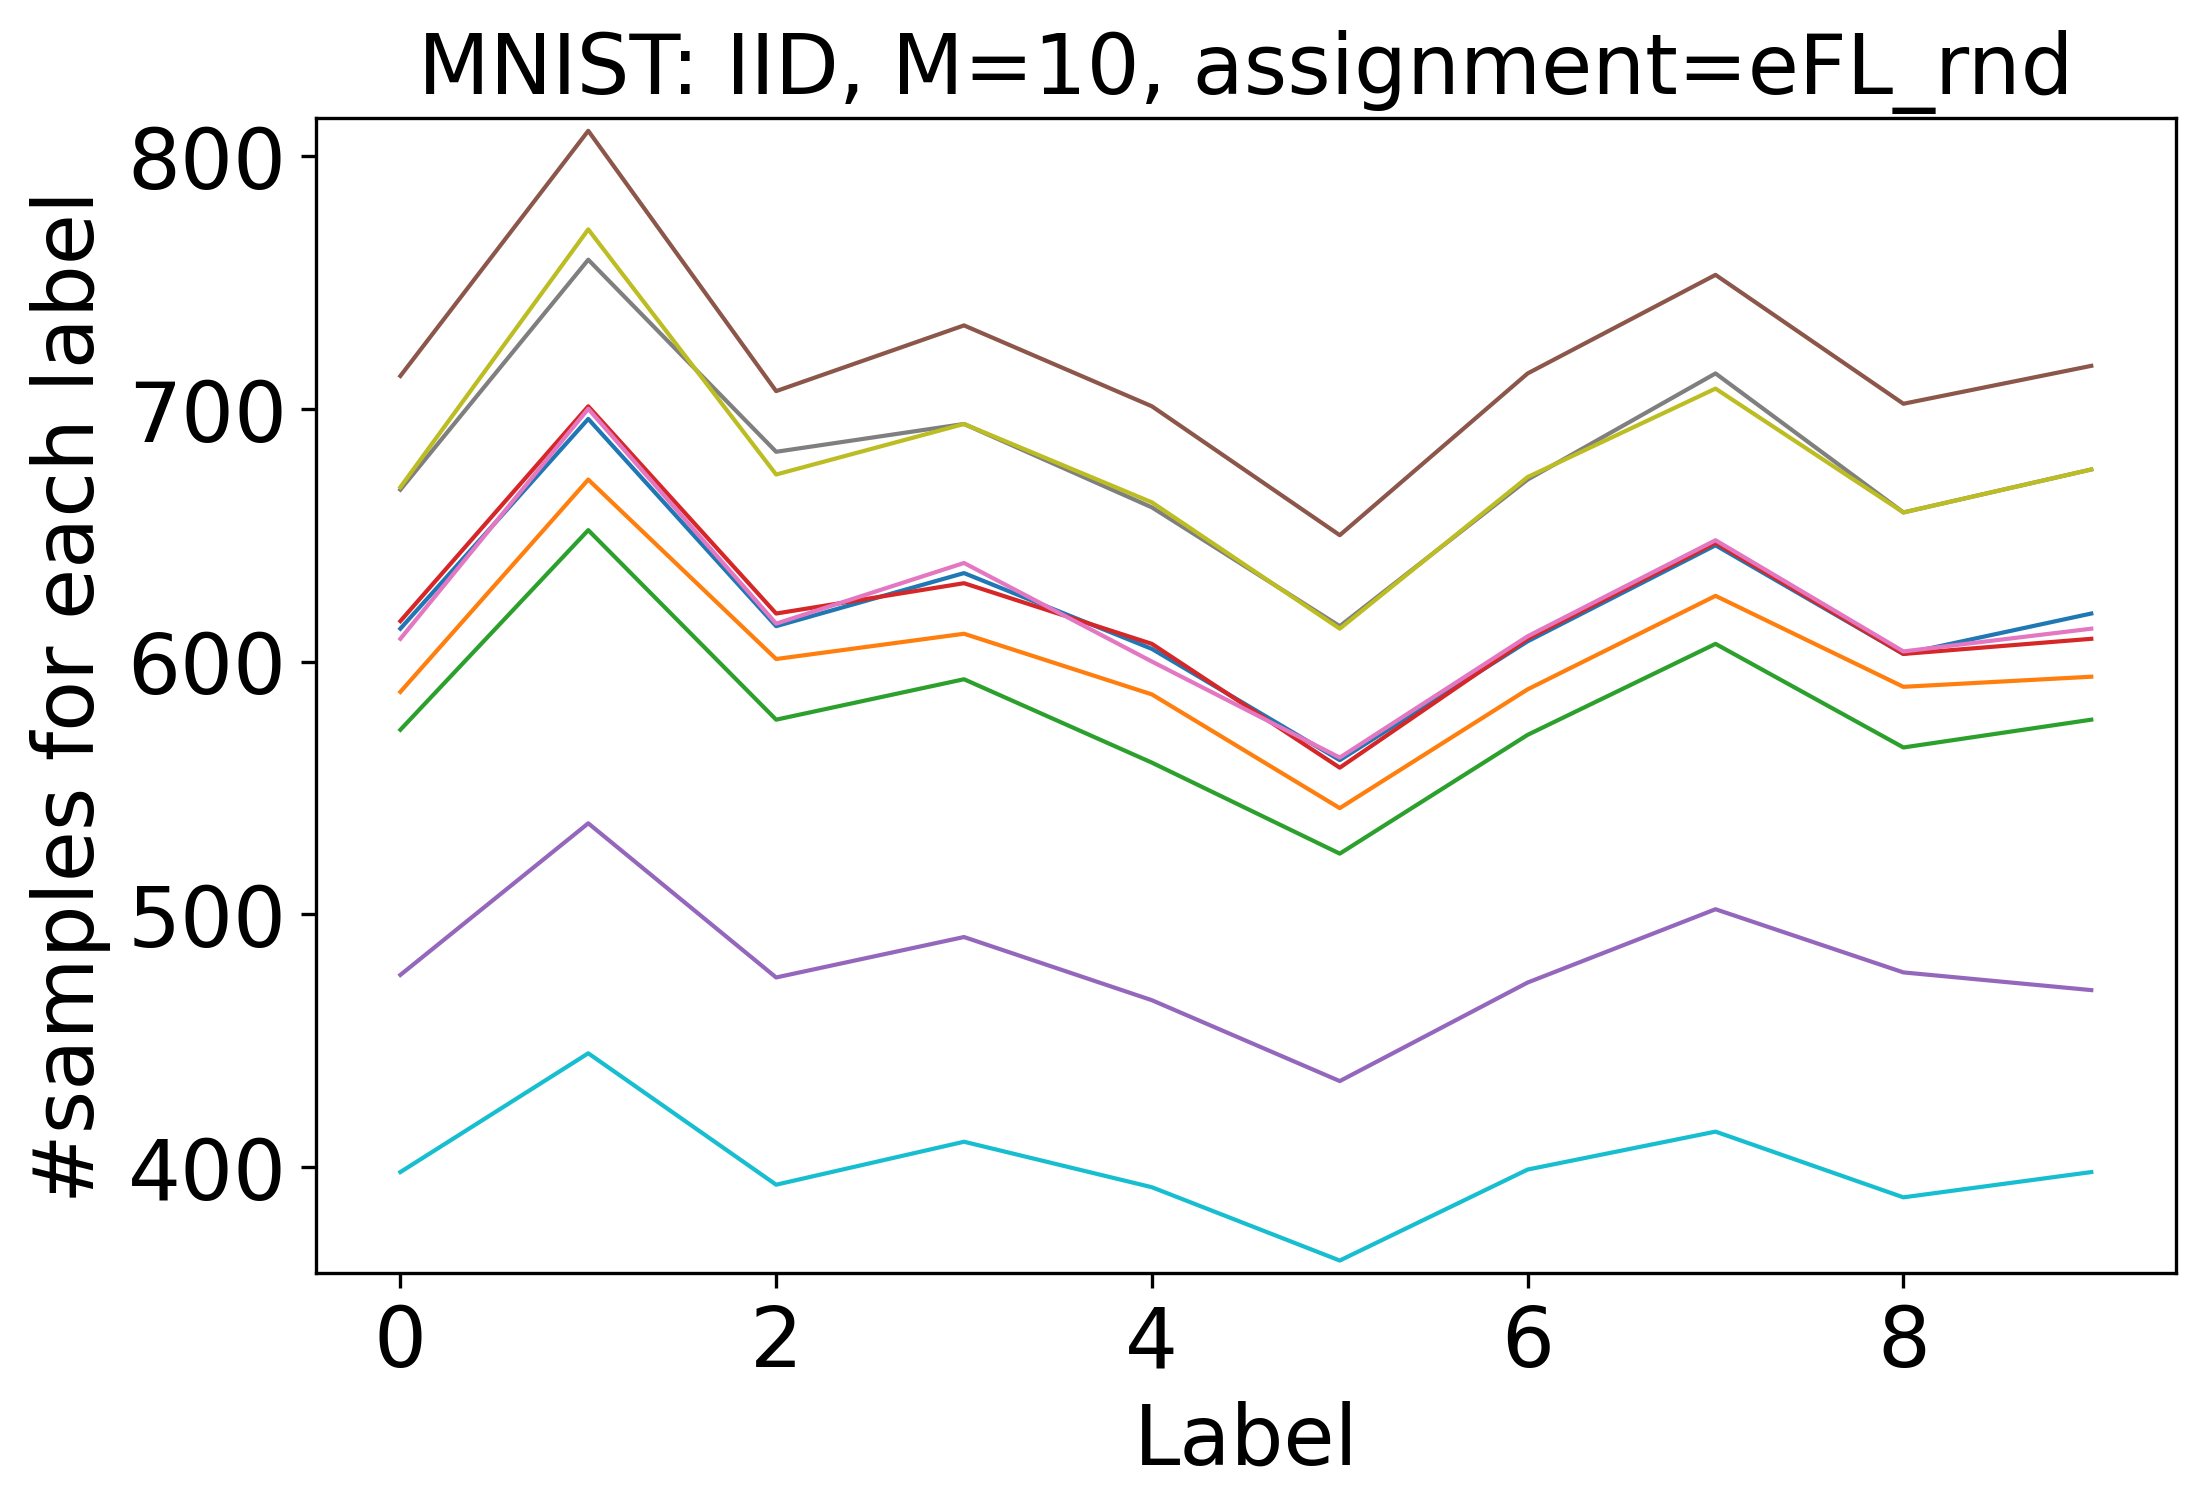

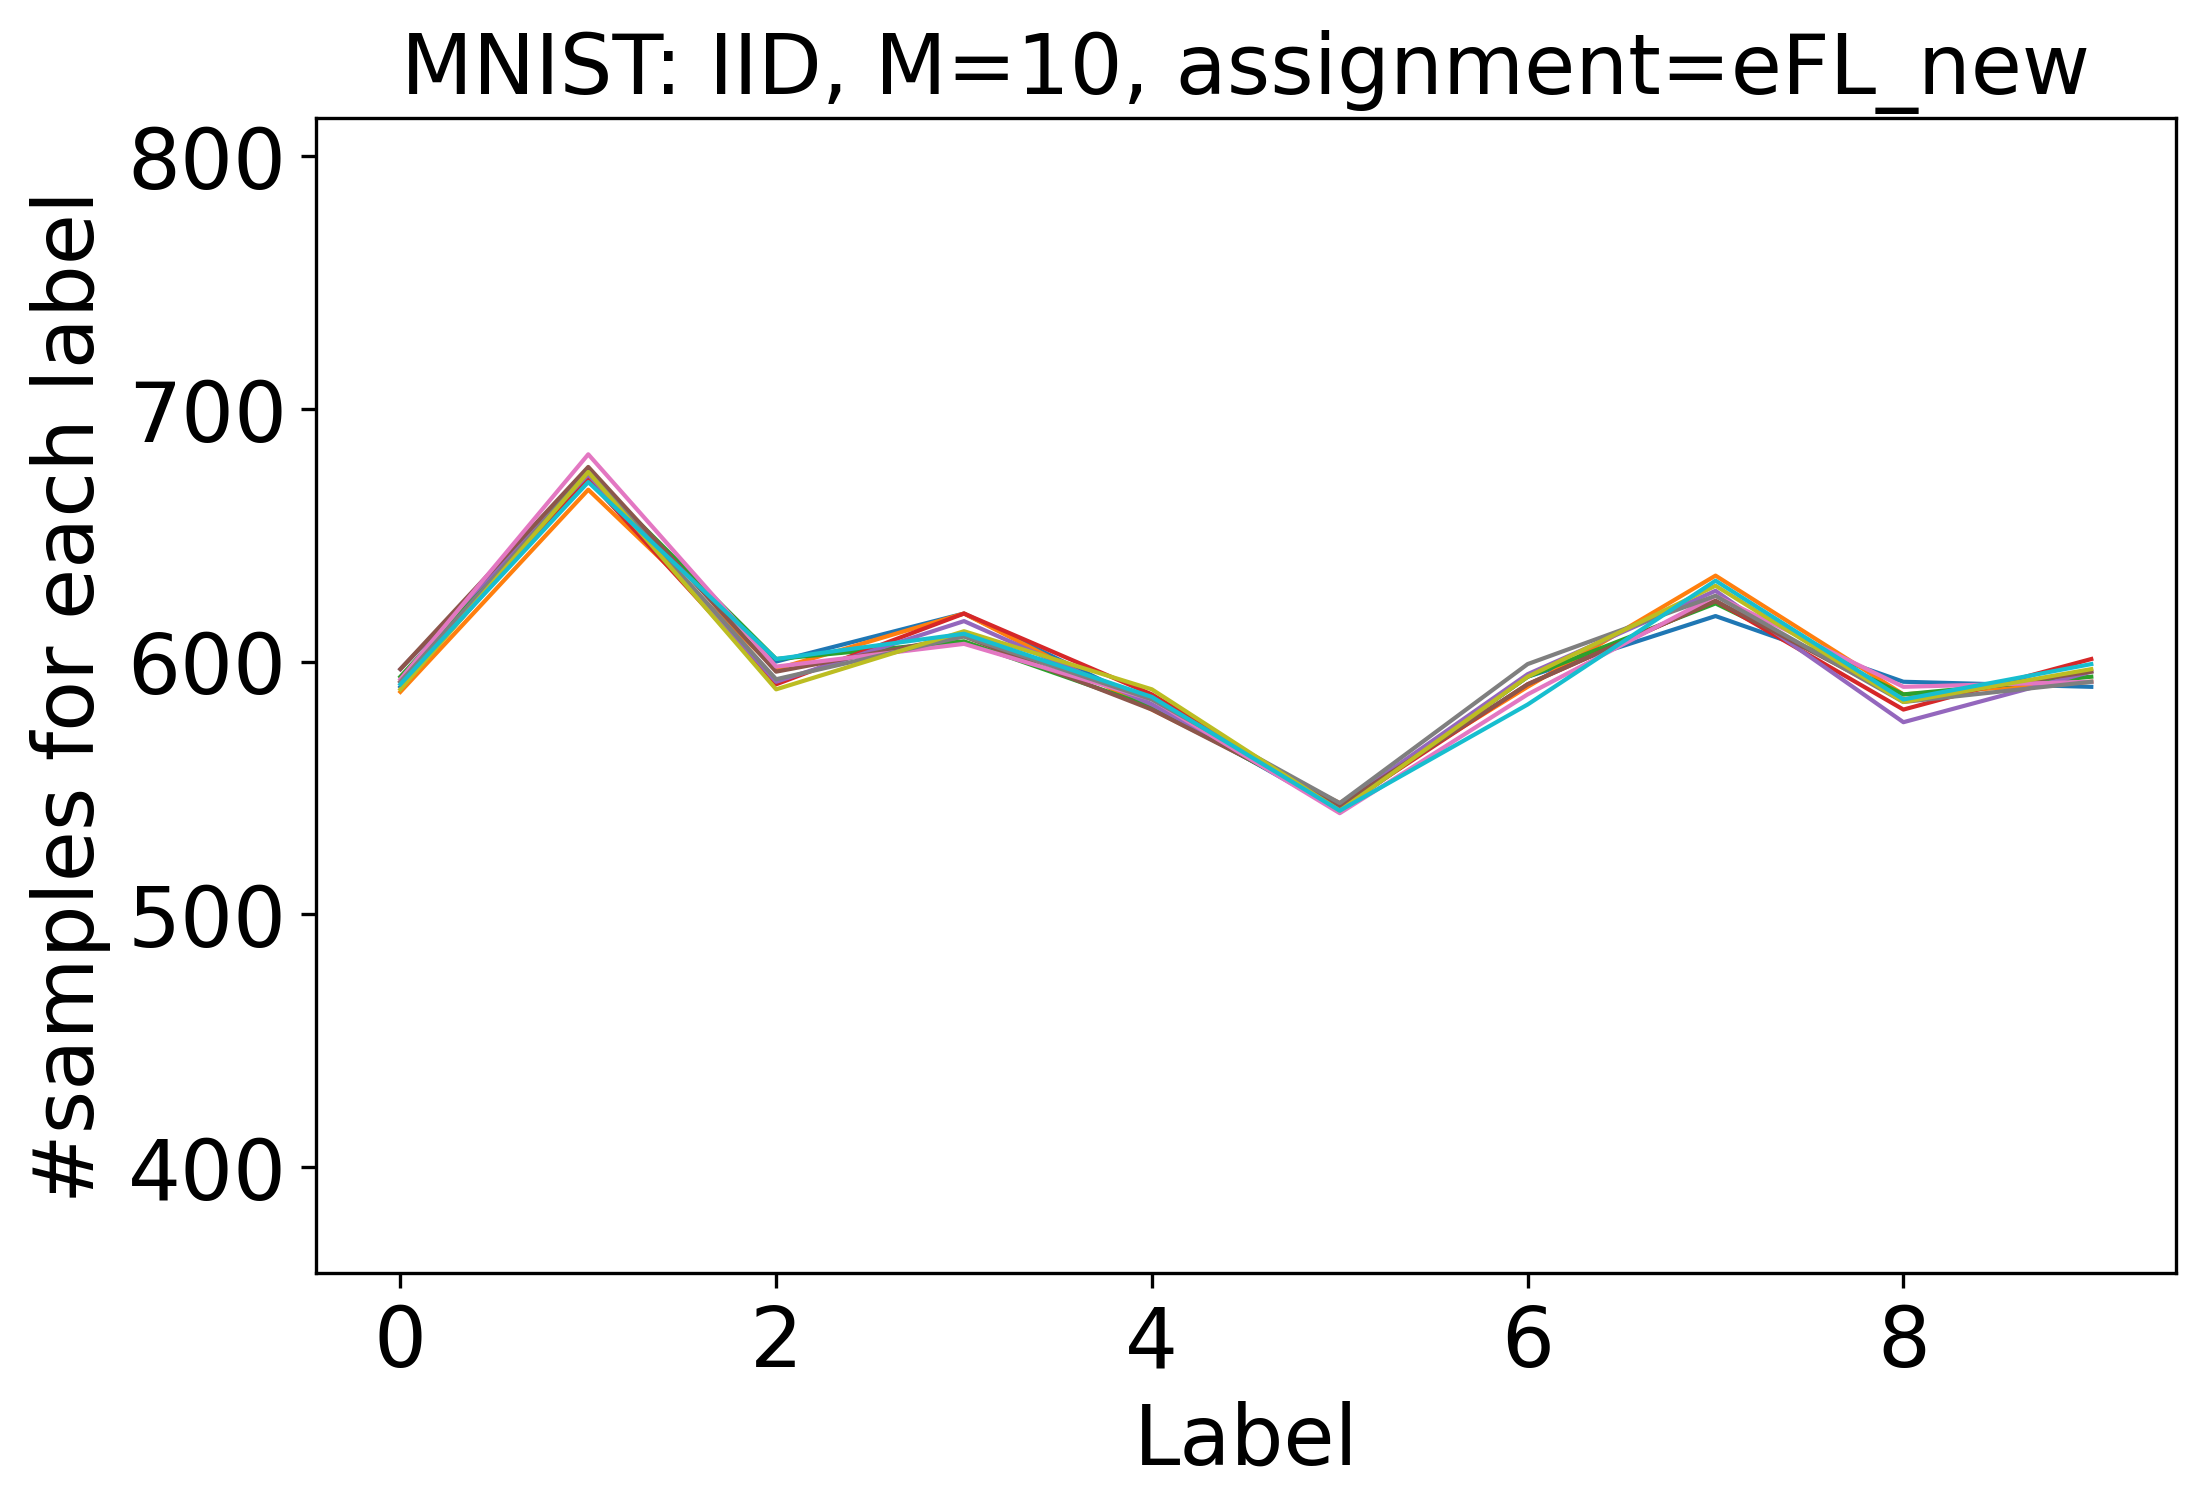

In [12]:

#rnd

#print(arr_rnd_lines)

ymin_rnd = min([min([min(rnd_lines[i][1]) for i in range(nlines)])])
ymin_metis = min([min([min(metis_lines[i][1]) for i in range(nlines)])])
ymin = max(0, min(ymin_rnd, ymin_metis) - 5)

ymax_rnd = max([max([max(rnd_lines[i][1]) for i in range(nlines)])])
ymax_metis = max([max([max(metis_lines[i][1]) for i in range(nlines)])])
ymax = 5 + max(ymax_rnd, ymax_metis)


fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(300)

ax.set_title("MNIST: IID, M="+ str(nlines) + ", assignment=eFL_rnd", size=fontsize) #random assignment, label_dist_files[0]
for i in range(nlines):
    ax.plot(rnd_lines[i][0], rnd_lines[i][1], linewidth=1)

ax.set_ylabel("#samples for each label", size=fontsize)
ax.set_xlabel("Label", size=fontsize)
ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

#metis

fig, ax = plt.subplots(figsize=(8,5))
ax.figure.set_dpi(300)

ax.set_title("MNIST: IID, M=" + str(nlines)+ ", assignment=eFL_new", size=fontsize) #metis assignment, label_dist_files[1]
for i in range(nlines):
    ax.plot(metis_lines[i][0], metis_lines[i][1],linewidth=1)

ax.set_ylabel("#samples for each label", size=fontsize)
ax.set_xlabel("Label", size=fontsize)
ax.set_ylim(ymin = ymin, ymax=ymax)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()
